# Explore here

In [490]:
import pandas as pd

df = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")
df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


In [491]:
df[['is_spam']].groupby('is_spam').value_counts()

is_spam
False    2303
True      696
Name: count, dtype: int64

In [492]:
df.dtypes

url        object
is_spam      bool
dtype: object

In [493]:
df["is_spam"] = df["is_spam"].astype(bool).astype(int)
df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,0
2995,https://www.youtube.com/watch,1
2996,https://techcrunch.com/2019/07/04/an-optimisti...,0
2997,https://www.technologyreview.com/2019/12/20/13...,0


In [494]:
df[['is_spam']].groupby('is_spam').value_counts()

is_spam
0    2303
1     696
Name: count, dtype: int64

In [495]:
print(df.shape)
print(f"Spam: {len(df.loc[df.is_spam == 1])}")
print(f"No spam: {len(df.loc[df.is_spam == 0])}")

(2999, 2)
Spam: 696
No spam: 2303


In [496]:
total_data = df.drop_duplicates()
total_data = df.reset_index(inplace = False, drop = True)
total_data.shape

(2999, 2)

In [497]:
import re


def preprocess_url(url):
    # Convertir a minúsculas
    url = url.lower()

    # Eliminar todos los signos de puntuación y los términos comunes
    url = re.sub(r'[^\w\s]|www|https?|http|com', '', url)

    url = re.sub(r'\d+', '', url)

    # Dividir la URL en partes
 # Encontrar y seleccionar solo palabras completas
    words = re.findall(r'\b[a-zA-Z]+\b', url)

    # Formatear las palabras entre corchetes []
    url_processed = "[" + ",".join(words) + "]"

    return url_processed

# Aplicar el preprocesamiento a la columna "URL" del DataFrame
df["url"] = df["url"].apply(preprocess_url)

# Mostrar las primeras filas del DataFrame para verificar el resultado
df

,url,is_spam
0,[briefingdayuslistmanageunsubscribe],1
1,[hvper],1
2,[briefingdaymvnif],1
3,[briefingdaynmmentform],0
4,[briefingdayfan],1
...,...,...
2994,[smartcitiesworldnetnewsnewsdeepfaketechnology...,0
2995,[youtubewatch],1
2996,[techcrunchanoptimisticviewofdeepfakes],0
2997,[technologyreviewthisstartupclaimsitsdeepfakes...,0


In [498]:
df

,url,is_spam
0,[briefingdayuslistmanageunsubscribe],1
1,[hvper],1
2,[briefingdaymvnif],1
3,[briefingdaynmmentform],0
4,[briefingdayfan],1
...,...,...
2994,[smartcitiesworldnetnewsnewsdeepfaketechnology...,0
2995,[youtubewatch],1
2996,[techcrunchanoptimisticviewofdeepfakes],0
2997,[technologyreviewthisstartupclaimsitsdeepfakes...,0


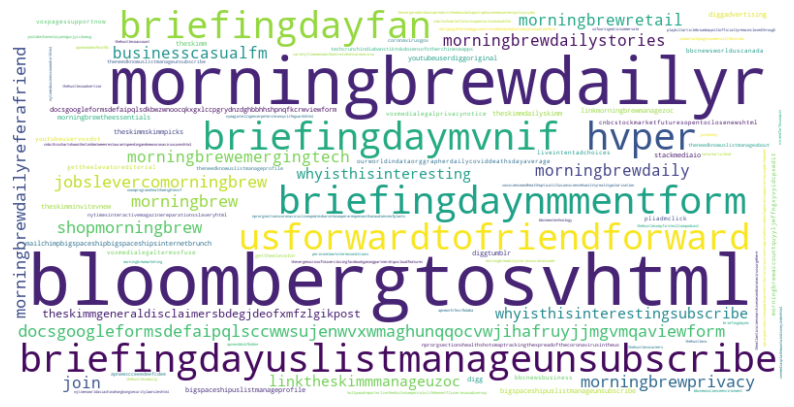

In [499]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para extraer tokens de una URL procesada
def extract_tokens(url):
    # Remover corchetes y comas
    url = re.sub(r'[\[\],]', '', url)
    
    # Dividir la URL procesada en tokens (palabras)
    tokens = url.split()
    
    return tokens

tokens_list = df["url"].apply(extract_tokens)

all_tokens = [token for tokens in tokens_list for token in tokens]

token_freq = Counter(all_tokens)

# Crear la wordcloud a partir de los tokens y sus frecuencias
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_freq)

# Mostrar la wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [500]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir la lista de tokens en una lista de strings
tokens_list_str = [" ".join(tokens) for tokens in tokens_list]

# Crear un objeto TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=5)

# Aplicar TfidfVectorizer a la lista de tokens
X = vectorizer.fit_transform(tokens_list_str).toarray()

y = df["is_spam"]

# Mostrar las primeras 5 filas de la matriz X
X[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 

In [501]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [502]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define los hiperparámetros a ajustar
param_grid = {
    'C': [0.1, 1, 10, 100],                    # Parámetro de regularización
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Tipo de kernel
    'gamma': ['scale', 'auto'],                # Coeficiente del kernel
    'class_weight': [None, 'balanced'],        # Peso de las clases
    'probability': [True, False],               # Habilitar predicción de probabilidades
    'shrinking': [True, False],                 # Reducción de vectores de soporte
}

# Instancia el modelo SVC
svm_model = SVC()

# Realiza la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Ajusta el modelo a los datos
grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Muestra la mejor puntuación obtenida
print("Mejor puntuación:", grid_search.best_score_)


Mejores hiperparámetros: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'poly', 'probability': True, 'shrinking': True}
Mejor puntuación: 0.9087204244954765


In [503]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [504]:
y_pred.shape

(600,)

In [505]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)*100

90.0

In [506]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcula las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # o 'micro', 'macro', 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')  # o 'micro', 'macro', 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted')  # o 'micro', 'macro', 'weighted'

# Imprime las métricas
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)


Accuracy: 90.0
Precision: 91.16504854368934
Recall: 90.0
F1 Score: 89.00493052442849


METRICAS SIN OPTIMIZACION DE HIPER PARAMETROS:Accuracy: 90.0 / Precision: 91.16504854368934 / Recall: 90.0 / F1 Score: 89.00493052442849


In [507]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import joblib

# Entrenar un modelo SVM de ejemplo (puedes reemplazar esto con tu propio modelo)
X, y = load_iris(return_X_y=True)
model = SVC(kernel='linear')
model.fit(X, y)

# Guardar el modelo en un archivo
joblib.dump(model, 'modelo_svm.pkl')


['modelo_svm.pkl']